In [2]:
# Python
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('all_car_adverts.csv')

In [4]:
# Sample n random rows... FOR QUICK TESTING ONLY
# REMOVE THIS CELL FOR FULL TESTING
data_sample = data.sample(n=20000, random_state=42).reset_index(drop=True)
print(f"Sampled data shape: {data_sample.shape}")

Sampled data shape: (20000, 32)


In [5]:

# Identify numeric columns automatically, for KMC.
numeric_cols = data_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [6]:
# Define a preprocessing pipeline: impute missing numeric values with the mean and then scale.
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

In [7]:
# Create a ColumnTransformer for the numeric columns only
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_cols)
])

# Preprocess the data
X_numeric = preprocessor.fit_transform(data_sample)

In [8]:
# Perform K-means clustering on the preprocessed numeric data.
n_clusters = 5  # number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric)

data_sample['cluster'] = clusters

In [9]:
# Reduce dimensions to 2D using PCA for visualization.
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_numeric)

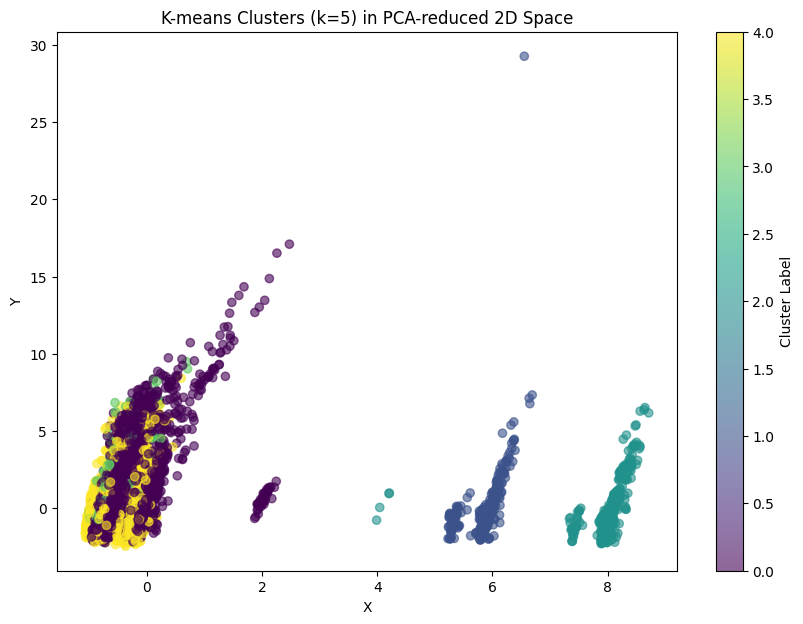

In [10]:

# Create a scatter plot of the clusters.
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('K-means Clusters (k={}) in PCA-reduced 2D Space'.format(n_clusters))
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(scatter, label='Cluster Label')
plt.show()